In [1]:
# set up
import pandas as pd
import numpy as np
import pickle
import time 
import os
import matplotlib.pyplot as plt
from datetime import datetime
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
data_folder_path = 'C:\\Users\\goodluck\\Desktop\\database_workspace'
raw_data_path =  "C:\\Users\\goodluck\\Desktop\\database_workspace\\raw_data"
storage_path =  "C:\\Users\\goodluck\\Desktop\\database_workspace\\database_storage"
DTBS_path = os.path.join(storage_path, "DTBS.pkl")

In [2]:
# re-open
with open(DTBS_path, 'rb') as f:  
    DTBS = pickle.load(f)

In [3]:
# select based on category
def select_eq(cons, key='cat1', DB=DTBS):
    sel = []
    for con in cons:
        s = []
        for code in DTBS['B'].keys():
            if DTBS['B'][code][key] == con:
                s.append(code)
                
        sel.append(s)
    return sel

In [4]:
sel = select_eq(['有色金属(2021)','银行(2021)','电力设备(2021)','石油石化(2021)'])
print(sel)

[['113025.SH', '113027.SH', '113046.SH', '113534.SH', '113600.SH', '113641.SH', '123012.SZ', '123085.SZ', '123169.SZ', '127019.SZ', '127020.SZ', '127053.SZ', '127068.SZ', '128072.SZ', '128081.SZ', '128109.SZ', '128111.SZ', '128082.SZ'], ['110043.SH', '110053.SH', '110059.SH', '110079.SH', '113011.SH', '113021.SH', '113037.SH', '113042.SH', '113050.SH', '113052.SH', '113055.SH', '113056.SH', '113062.SH', '113065.SH', '113516.SH', '127032.SZ', '128034.SZ', '128048.SZ', '128129.SZ'], ['113059.SH', '118000.SH', '118005.SH', '118008.SH', '118020.SH', '118022.SH', '123158.SZ', '127073.SZ', '128095.SZ', '110074.SH', '110082.SH', '111000.SH', '113505.SH', '113546.SH', '113549.SH', '118014.SH', '118019.SH', '118026.SH', '123014.SZ', '123034.SZ', '123044.SZ', '123071.SZ', '123089.SZ', '123141.SZ', '123142.SZ', '123147.SZ', '123148.SZ', '123149.SZ', '123155.SZ', '123159.SZ', '123161.SZ', '127052.SZ', '127066.SZ', '127074.SZ', '128042.SZ', '128145.SZ', '110085.SH', '113053.SH', '113661.SH', '11802

In [6]:
DTBS['B']

{'110088.SH': {'cn': '淮22转债',
  'ipo': '2022-10-20',
  'cat1': '煤炭(2021)',
  'cat2': '焦炭Ⅱ(2021)'},
 '113545.SH': {'cn': '金能转债',
  'ipo': '2019-11-07',
  'cat1': '煤炭(2021)',
  'cat2': '焦炭Ⅱ(2021)'},
 '113631.SH': {'cn': '皖天转债',
  'ipo': '2021-12-10',
  'cat1': '公用事业(2021)',
  'cat2': '燃气Ⅱ(2021)'},
 '123128.SZ': {'cn': '首华转债',
  'ipo': '2021-11-18',
  'cat1': '公用事业(2021)',
  'cat2': '燃气Ⅱ(2021)'},
 '123156.SZ': {'cn': '博汇转债',
  'ipo': '2022-09-02',
  'cat1': '石油石化(2021)',
  'cat2': '炼化及贸易(2021)'},
 '127027.SZ': {'cn': '靖远转债',
  'ipo': '2021-01-22',
  'cat1': '煤炭(2021)',
  'cat2': '煤炭开采(2021)'},
 '127061.SZ': {'cn': '美锦转债',
  'ipo': '2022-05-30',
  'cat1': '煤炭(2021)',
  'cat2': '焦炭Ⅱ(2021)'},
 '110047.SH': {'cn': '山鹰转债',
  'ipo': '2018-12-10',
  'cat1': '轻工制造(2021)',
  'cat2': '造纸(2021)'},
 '110063.SH': {'cn': '鹰19转债',
  'ipo': '2020-01-03',
  'cat1': '轻工制造(2021)',
  'cat2': '造纸(2021)'},
 '110070.SH': {'cn': '凌钢转债',
  'ipo': '2020-05-13',
  'cat1': '钢铁(2021)',
  'cat2': '普钢(2021)'},
 '110087

2022-01-01 2023-01-01


In [5]:
def sel_DTBS(DTBS, st, ed):
    TS_SEL = dict()
    for code in DTBS['A'].keys():
        TS_SEL[code] = dict()
        for time in DTBS['A'][code].keys():
            dt = datetime.strptime(time, '%Y-%m-%d').date()
            if dt >= st:
                if dt <= ed:
                    TS_SEL[code][time] = DTBS['A'][code][time]
    return TS_SEL
        

In [25]:
DTBS['A'].keys()

dict_keys(['110088.SH', '113545.SH', '113631.SH', '123128.SZ', '123156.SZ', '127027.SZ', '127061.SZ', '110047.SH', '110063.SH', '110070.SH', '110087.SH', '110089.SH', '110092.SH', '111001.SH', '111002.SH', '111003.SH', '111007.SH', '111012.SH', '113025.SH', '113027.SH', '113046.SH', '113047.SH', '113058.SH', '113059.SH', '113064.SH', '113534.SH', '113535.SH', '113566.SH', '113591.SH', '113600.SH', '113615.SH', '113621.SH', '113623.SH', '113632.SH', '113636.SH', '113638.SH', '113640.SH', '113641.SH', '113649.SH', '113650.SH', '113653.SH', '113657.SH', '113663.SH', '118000.SH', '118005.SH', '118006.SH', '118008.SH', '118010.SH', '118018.SH', '118020.SH', '118022.SH', '118023.SH', '118028.SH', '118029.SH', '123012.SZ', '123013.SZ', '123031.SZ', '123046.SZ', '123052.SZ', '123057.SZ', '123076.SZ', '123078.SZ', '123085.SZ', '123091.SZ', '123106.SZ', '123118.SZ', '123124.SZ', '123126.SZ', '123129.SZ', '123144.SZ', '123152.SZ', '123158.SZ', '123165.SZ', '123166.SZ', '123168.SZ', '123169.SZ', '

In [7]:
# generate database subset within given time
st = datetime.strptime("2022/01/01", '%Y/%m/%d').date()
ed = datetime.strptime("2023/01/01", '%Y/%m/%d').date()
print(st, ed)
TS_SEL = sel_DTBS(DTBS, st, ed)
print(TS_SEL['113048.SH'])

2022-01-01 2023-01-01
{'2022-01-04': {'cpr': 16.6299, 'dp': 176.44, 'dl': 193.0699}, '2022-01-05': {'cpr': 15.3517, 'dp': 171.76, 'dl': 187.11169999999998}, '2022-01-06': {'cpr': 16.8743, 'dp': 169.96, 'dl': 186.8343}, '2022-01-07': {'cpr': 15.5724, 'dp': 163.41, 'dl': 178.98239999999998}, '2022-01-10': {'cpr': 14.5686, 'dp': 162.83, 'dl': 177.39860000000002}, '2022-01-11': {'cpr': 14.7402, 'dp': 157.4, 'dl': 172.1402}, '2022-01-12': {'cpr': 17.1019, 'dp': 162.57, 'dl': 179.6719}, '2022-01-13': {'cpr': 17.3212, 'dp': 153.42, 'dl': 170.7412}, '2022-01-14': {'cpr': 14.5912, 'dp': 149.85, 'dl': 164.44119999999998}, '2022-01-17': {'cpr': 17.148, 'dp': 154.91, 'dl': 172.058}, '2022-01-18': {'cpr': 19.7133, 'dp': 158.96, 'dl': 178.6733}, '2022-01-19': {'cpr': 20.0301, 'dp': 160.26, 'dl': 180.2901}, '2022-01-20': {'cpr': 20.9275, 'dp': 157.25, 'dl': 178.1775}, '2022-01-21': {'cpr': 21.6844, 'dp': 158.68, 'dl': 180.36440000000002}, '2022-01-24': {'cpr': 22.1627, 'dp': 159.08, 'dl': 181.2427}, 

In [194]:
# 
def select_industry(DTBS, iid):
    TS = dict()

    for one_iid in iid:
        count = 0
        for code in list(DTBS['A'].keys()):
            if DTBS['B'][code]['cat1'] == one_iid:
                TS[code] = DTBS['A'][code]
                count += 1
        print(one_iid, count)
    
    return TS

In [90]:
TS = select_industry(DTBS,['农林牧渔(2021)'])
TS

{'123063.SZ': {'2017-01-03': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-04': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-05': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-06': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-09': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-10': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-11': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-12': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-13': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-16': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-17': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-18': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-19': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-20': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-23': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-24': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-25': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-01-26': {'cpr': nan, 'dp': nan, 'dl': 999},
  '2017-02-03': {'cpr': nan, 'dp': nan, 'dl': 999},

In [91]:
for i in TS.keys():
    print(DTBS['B'][i]['cat1'])
    

农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)
农林牧渔(2021)


In [28]:
def select_existing(PTS, dt):
    exist = []
    for code in list(PTS.keys()):
        if not np.isnan(PTS[code][dt]['dp']):
            exist.append(code)
    return exist

In [41]:
def sel_dts(DD, st, ed, tp):
    dts = []
    stdt = datetime.strptime(st, '%Y-%m-%d').date()
    eddt = datetime.strptime(ed, '%Y-%m-%d').date()
    for time in DD[tp]:
        dt = datetime.strptime(time, '%Y-%m-%d').date()
        if dt >= stdt:
            if dt <= eddt:
                dts.append(time)
    return dts
        

In [33]:
select_existing(TS,'2022-01-04')

['123063.SZ',
 '113565.SH',
 '123056.SZ',
 '123107.SZ',
 '127015.SZ',
 '127045.SZ',
 '127049.SZ',
 '128026.SZ',
 '128030.SZ',
 '128036.SZ',
 '128114.SZ']

In [ ]:

        
def double_low_profit(TS, days, start_id, gap, sel_num, step, end_id = 2000):
    profit = []
    sum_dl = 0
    sel_days = days[start_id:end_id:step]
    all_codes = []
    res = []
    
    for i in range(len(sel_days)):  
        curr_dl_codes = retrieve_low_nodes(TS, sel_days, i, sel_num)
        all_codes.append(curr_dl_codes)
        if i >= gap:
        
            tw = 0
            lw = 0
            for cd in all_codes[i-gap]:
                tw += TS[cd][sel_days[i]]['dp']
        
        
            for cd in all_codes[i-gap]:
                lw += TS[cd][sel_days[i-gap]]['dp']
        
            re = ((tw - lw)/ lw)
            res.append(re)
            sum_dl += re
        
            profit.append(sum_dl)
    return profit, sel_days, res


def plot_str(start_id, sel_days, gap, step, profit,tick_spacing = 60):
    plt.figure()
    tick_spacing = tick_spacing
    fig, ax = plt.subplots(1,1)
    plt.plot(sel_days, profit)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('Increase per year/%')
    plt.show()
    





In [152]:
def takeSecond(elem):
    return elem[1]


def retrieve_low_nodes(TS, days, index, sel_num):
    dl_rank = []
    for code in list(TS.keys()):
        dl_rank.append((code, TS[code][days[index]]['dl']))
        
        dl_rank.sort(key=takeSecond)    
    low = dl_rank[0:sel_num]
    return [j[0] for j in low]

def win_rt(res):
    print("For each transaction:")
    print("Max profit", max(res))
    print("Max loss", min(res))
    wins = []
    win = 0
    for i in res:
        if i >= 0:
            win += 1
            wins.append(True)
        else:
            wins.append(False)
        
    win_rate = win/len(res)
    print("Rate of wins", win_rate)
    print("Info for each transaction", wins)

In [154]:
def all_profit(DTBS, days, ct, sel_ct, sel_dl, sel_num):
    profit = []
    sum_dl = 0
    all_codes = []
    res = []
    if sel_ct == 1:
        TS = select_industry(DTBS, ct)
    else:
        TS = DTBS['A']
    for i in range(len(days)):  
        if sel_dl == 1:
            curr_dl_codes = retrieve_low_nodes(TS, days, i, sel_num)
        else:
            curr_dl_codes = select_existing(TS, days[i])
        all_codes.append(curr_dl_codes)
        if i >= 1:
        
            tw = 0
            lw = 0
            for cd in all_codes[i-i]:
                tw += TS[cd][days[i]]['dp']
        
        
            for cd in all_codes[i-i]:
                lw += TS[cd][days[i-1]]['dp']
        
            re = ((tw - lw)/ lw)
            res.append(re)
            sum_dl += re
        
            profit.append(sum_dl)
    return profit, res
    
    

In [143]:
def plot_str(days, profit,tick_spacing = 4.5, market = DTBS['C']):
    plt.figure()
    fig, ax = plt.subplots(1,1)
    plt.plot(days[1:], profit)
    # ewi
    i_x = [days[1], days[-1]]
    market_gain = (market['ewi'][days[-1]]-market['ewi'][days[0]])/(market['ewi'][days[0]])
    i_y = [0, market_gain]
    plt.plot(i_x, i_y)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.ylabel('Increase per year/%')
    plt.show()
    print("Final gain", profit[-1])
    print("Market index", market_gain)

In [144]:
f2020 = sel_dts(DTBS['D'],'2020-01-01','2020-06-30','mon')
s2020 = sel_dts(DTBS['D'],'2020-07-01','2020-12-31','mon')
f2021 = sel_dts(DTBS['D'],'2021-01-01','2021-06-30','mon')
s2021 = sel_dts(DTBS['D'],'2021-07-01','2021-12-31','mon')
f2022 = sel_dts(DTBS['D'],'2022-01-01','2022-06-30','mon')
s2022 = sel_dts(DTBS['D'],'2022-07-01','2022-12-31','mon')
a2023 = sel_dts(DTBS['D'],'2023-01-01','2023-2-28','mon')
a2020 = sel_dts(DTBS['D'],'2020-01-01','2020-12-31','mon')
a2021 = sel_dts(DTBS['D'],'2021-01-01','2021-12-31','mon')
a2022 = sel_dts(DTBS['D'],'2022-01-01','2022-12-31','mon')


<Figure size 432x288 with 0 Axes>

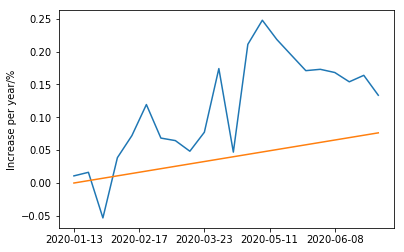

Final gain 0.13351427022387022
Market index 0.07631050038558825
For each transaction:
Max profit 0.16392971251458252
Max loss -0.12705219725722403
Rate of wins 0.5
Info for each transaction [True, True, False, True, True, True, False, False, False, True, True, False, True, True, False, False, False, True, False, False, True, False]


In [183]:
profit, res = all_profit(DTBS, f2020, ['农林牧渔(2021)','基础化工(2021)','美容护理(2021)','通信(2021)', '非银金融(2021)', '电力设备(2021)','汽车(2021)','电子(2021)'], 1, 0, 2)
plot_str(f2020, profit)
win_rt(res)

<Figure size 432x288 with 0 Axes>

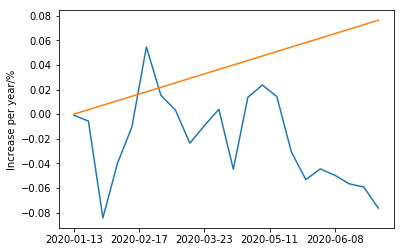

Final gain -0.07640671913847914
Market index 0.07631050038558825
For each transaction:
Max profit 0.06501901572058685
Max loss -0.07867007992007996
Rate of wins 0.36363636363636365
Info for each transaction [False, False, False, True, True, True, False, False, False, True, True, False, True, True, False, False, False, True, False, False, False, False]


In [184]:
profit, res = all_profit(DTBS, f2020, ['有色金属(2021)'], 1, 0, 2)
plot_str(f2020, profit)
win_rt(res)

In [ ]:
['农林牧渔(2021)', '基础化工(2021)', '美容护理(2021)', '通信(2021)', '非银金融(2021)', '电力设备(2021)', '汽车(2021)', '电子(2021)'], ['家用电器(2021)', '基础化工(2021)', '建筑材料(2021)', '建筑装饰(2021)', '机械设备(2021)', '商贸零售(2021)', '计算机(2021)', '国防军工(2021)', '钢铁(2021)', '传媒(2021)'], ['汽车(2021)', '交通运输(2021)', '农林牧渔(2021)', '煤炭(2021)', '有色金属(2021)', '商贸零售(2021)', '机械设备(2021)', '钢铁(2021)', '电力设备(2021)', '基础化工(2021)'], ['电力设备(2021)', '有色金属(2021)', '交通运输(2021)', '钢铁(2021)', '通信(2021)', '汽车(2021)', '基础化工(2021)', '轻工制造(2021)', '国防军工(2021)', '医药生物(2021)'], ['有色金属(2021)', '机械社保(2021)', '基础化工(2021)', '农林牧渔(2021)', '汽车(2021)', '交通运输(2021)', '国防军工(2021)', '医药生物(2021)', '通信(2021)', '电力设备(2021)'], ['有色金属(2021)', '农林牧渔(2021)', '汽车(2021)', '电力设备(2021)', '公用事业(2021)', '社会服务(2021)', '食品饮料(2021)', '医药生物(2021)', '轻工制造(2021)', '建筑材料(2021)'], ['建筑材料(2021)', '建筑装饰(2021)', '国防军工(2021)', '计算机(2021)', '通信(2021)', '食品饮料(2021)', '社会服务(2021)', '纺织服饰(2021)', '交通运输(2021)', '轻工制造(2021)']

<Figure size 432x288 with 0 Axes>

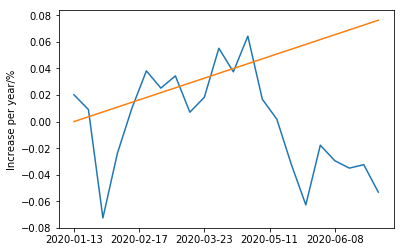

Final gain -0.05310522787974546
Market index 0.07631050038558825
For each transaction:
Max profit 0.048647996137131846
Max loss -0.08161637292163239
Rate of wins 0.45454545454545453
Info for each transaction [True, False, False, True, True, True, False, True, False, True, True, False, True, False, False, False, False, True, False, False, True, False]


In [185]:
profit, res = all_profit(DTBS, f2020, ['轻工制造(2021)'], 1, 0, 2)
plot_str(f2020, profit)
win_rt(res)

<Figure size 432x288 with 0 Axes>

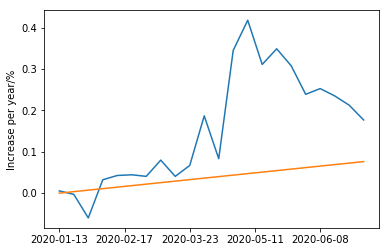

Final gain 0.1769768985109768
Market index 0.07631050038558825
For each transaction:
Max profit 0.2618435515665737
Max loss -0.10691401925592942
Rate of wins 0.5
Info for each transaction [True, False, False, True, True, True, False, True, False, True, True, False, True, True, False, True, False, False, True, False, False, False]


In [163]:
profit, res = all_profit(DTBS, f2020, ['农林牧渔(2021)'], 1, 1, 2)
plot_str(f2020, profit)
win_rt(res)

<Figure size 432x288 with 0 Axes>

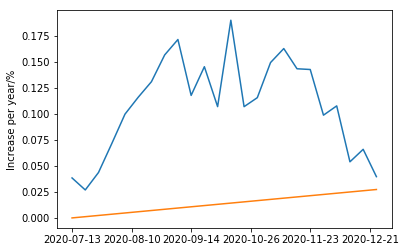

Final gain 0.039628021293259645
Market index 0.027279418690239036
For each transaction:
Max profit 0.08295155078045817
Max loss -0.08299951330912364
Rate of wins 0.625
Info for each transaction [True, False, True, True, True, True, True, True, True, False, True, False, True, False, True, True, True, False, False, False, True, False, True, False]


In [158]:
profit, res = all_profit(DTBS, s2020, ['家用电器(2021)'], 1, 0, 2)
plot_str(s2020, profit)
win_rt(res)

家用电器(2021) 9


<Figure size 432x288 with 0 Axes>

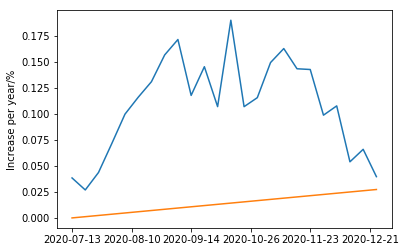

Final gain 0.039628021293259645
Market index 0.027279418690239036
For each transaction:
Max profit 0.08295155078045817
Max loss -0.08299951330912364
Rate of wins 0.625
Info for each transaction [True, False, True, True, True, True, True, True, True, False, True, False, True, False, True, True, True, False, False, False, True, False, True, False]
家用电器(2021) 9
基础化工(2021) 45


<Figure size 432x288 with 0 Axes>

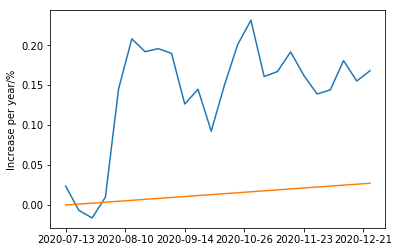

Final gain 0.168056033288105
Market index 0.027279418690239036
For each transaction:
Max profit 0.13579548965798213
Max loss -0.07040512358521543
Rate of wins 0.5833333333333334
Info for each transaction [True, False, False, True, True, True, False, True, False, False, True, False, True, True, True, False, True, True, False, False, True, True, False, True]
家用电器(2021) 9
基础化工(2021) 45
建筑材料(2021) 9


<Figure size 432x288 with 0 Axes>

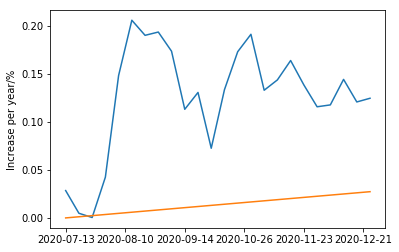

Final gain 0.12445218192217632
Market index 0.027279418690239036
For each transaction:
Max profit 0.10568378761375595
Max loss -0.060400186133084996
Rate of wins 0.5833333333333334
Info for each transaction [True, False, False, True, True, True, False, True, False, False, True, False, True, True, True, False, True, True, False, False, True, True, False, True]
家用电器(2021) 9
基础化工(2021) 45
建筑材料(2021) 9
建筑装饰(2021) 23


<Figure size 432x288 with 0 Axes>

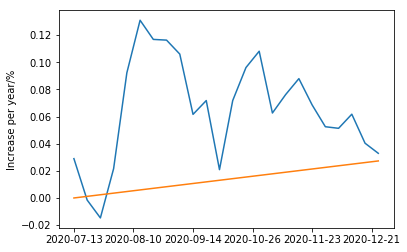

Final gain 0.0329147016856487
Market index 0.027279418690239036
For each transaction:
Max profit 0.07059936451935711
Max loss -0.05089836253401449
Rate of wins 0.4583333333333333
Info for each transaction [True, False, False, True, True, True, False, False, False, False, True, False, True, True, True, False, True, True, False, False, False, True, False, False]
家用电器(2021) 9
基础化工(2021) 45
建筑材料(2021) 9
建筑装饰(2021) 23
机械设备(2021) 34


<Figure size 432x288 with 0 Axes>

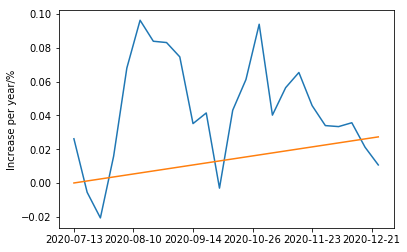

Final gain 0.010678673113157034
Market index 0.027279418690239036
For each transaction:
Max profit 0.05224006404930568
Max loss -0.05379671272743633
Rate of wins 0.4583333333333333
Info for each transaction [True, False, False, True, True, True, False, False, False, False, True, False, True, True, True, False, True, True, False, False, False, True, False, False]
家用电器(2021) 9
基础化工(2021) 45
建筑材料(2021) 9
建筑装饰(2021) 23
机械设备(2021) 34
商贸零售(2021) 3


<Figure size 432x288 with 0 Axes>

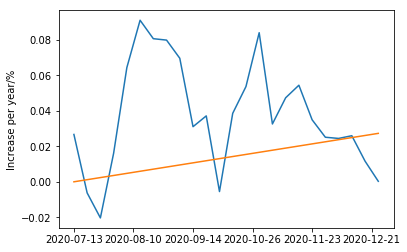

Final gain 0.00028355284642168216
Market index 0.027279418690239036
For each transaction:
Max profit 0.04827623066104061
Max loss -0.05141907183960419
Rate of wins 0.4583333333333333
Info for each transaction [True, False, False, True, True, True, False, False, False, False, True, False, True, True, True, False, True, True, False, False, False, True, False, False]
家用电器(2021) 9
基础化工(2021) 45
建筑材料(2021) 9
建筑装饰(2021) 23
机械设备(2021) 34
商贸零售(2021) 3
计算机(2021) 26


<Figure size 432x288 with 0 Axes>

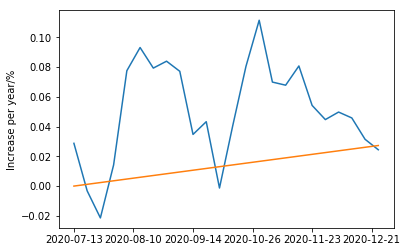

Final gain 0.024435852019542834
Market index 0.027279418690239036
For each transaction:
Max profit 0.06335355506737061
Max loss -0.04460372683317524
Rate of wins 0.4583333333333333
Info for each transaction [True, False, False, True, True, True, False, True, False, False, True, False, True, True, True, False, False, True, False, False, True, False, False, False]
家用电器(2021) 9
基础化工(2021) 45
建筑材料(2021) 9
建筑装饰(2021) 23
机械设备(2021) 34
商贸零售(2021) 3
计算机(2021) 26
国防军工(2021) 7


<Figure size 432x288 with 0 Axes>

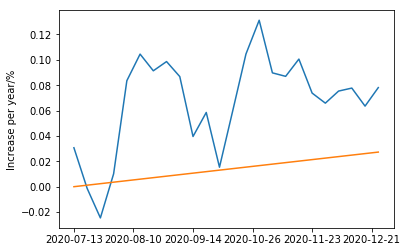

Final gain 0.0781238835391085
Market index 0.027279418690239036
For each transaction:
Max profit 0.07342373325472433
Max loss -0.04723893875676566
Rate of wins 0.5416666666666666
Info for each transaction [True, False, False, True, True, True, False, True, False, False, True, False, True, True, True, False, False, True, False, False, True, True, False, True]
家用电器(2021) 9
基础化工(2021) 45
建筑材料(2021) 9
建筑装饰(2021) 23
机械设备(2021) 34
商贸零售(2021) 3
计算机(2021) 26
国防军工(2021) 7
钢铁(2021) 7


<Figure size 432x288 with 0 Axes>

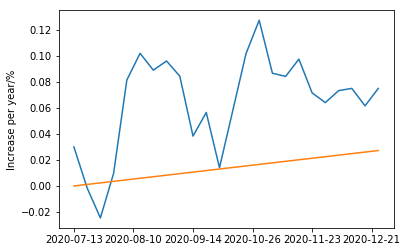

Final gain 0.07506859814491534
Market index 0.027279418690239036
For each transaction:
Max profit 0.07182884809980622
Max loss -0.04611549415758603
Rate of wins 0.5416666666666666
Info for each transaction [True, False, False, True, True, True, False, True, False, False, True, False, True, True, True, False, False, True, False, False, True, True, False, True]
家用电器(2021) 9
基础化工(2021) 45
建筑材料(2021) 9
建筑装饰(2021) 23
机械设备(2021) 34
商贸零售(2021) 3
计算机(2021) 26
国防军工(2021) 7
钢铁(2021) 7
传媒(2021) 6


<Figure size 432x288 with 0 Axes>

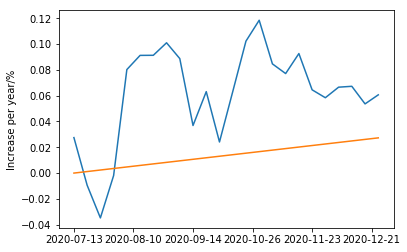

Final gain 0.06060931932565013
Market index 0.027279418690239036
For each transaction:
Max profit 0.08210507915821263
Max loss -0.05183442615265011
Rate of wins 0.5833333333333334
Info for each transaction [True, False, False, True, True, True, True, True, False, False, True, False, True, True, True, False, False, True, False, False, True, True, False, True]


In [204]:
name = ['家用电器(2021)', '基础化工(2021)', '建筑材料(2021)', '建筑装饰(2021)', '机械设备(2021)', '商贸零售(2021)', '计算机(2021)', '国防军工(2021)', '钢铁(2021)', '传媒(2021)']
for i in range(len(name)):
    profit, res = all_profit(DTBS, s2020, name[0:i+1], 1, 0, 2)
    plot_str(s2020, profit)
    win_rt(res)

<Figure size 432x288 with 0 Axes>

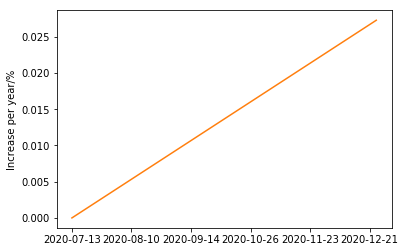

Final gain nan
Market index 0.027279418690239036
For each transaction:
Max profit nan
Max loss nan
Rate of wins 0.0
Info for each transaction [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


<Figure size 432x288 with 0 Axes>

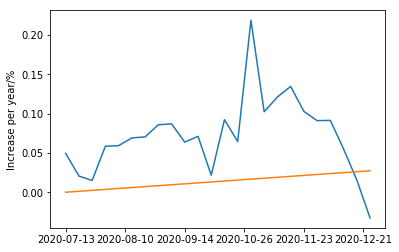

Final gain -0.03271092251665193
Market index 0.027279418690239036
For each transaction:
Max profit 0.15431138759288046
Max loss -0.11643208909284236
Rate of wins 0.5416666666666666
Info for each transaction [True, False, False, True, True, True, True, True, True, False, True, False, True, False, True, False, True, True, False, False, True, False, False, False]


<Figure size 432x288 with 0 Axes>

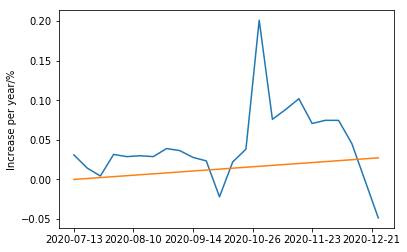

Final gain -0.0485504096867391
Market index 0.027279418690239036
For each transaction:
Max profit 0.1627528282482001
Max loss -0.12508439596078705
Rate of wins 0.4166666666666667
Info for each transaction [True, False, False, True, False, True, False, True, False, False, False, False, True, True, True, False, True, True, False, True, False, False, False, False]


<Figure size 432x288 with 0 Axes>

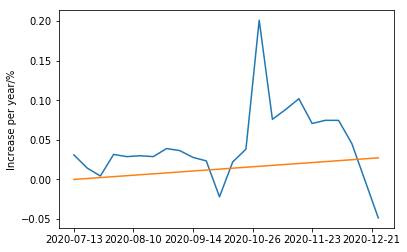

Final gain -0.0485504096867391
Market index 0.027279418690239036
For each transaction:
Max profit 0.1627528282482001
Max loss -0.12508439596078705
Rate of wins 0.4166666666666667
Info for each transaction [True, False, False, True, False, True, False, True, False, False, False, False, True, True, True, False, True, True, False, True, False, False, False, False]


<Figure size 432x288 with 0 Axes>

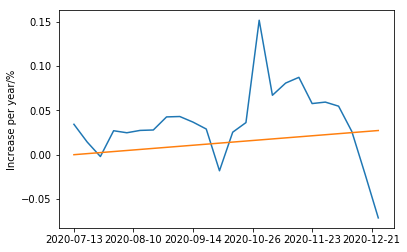

Final gain -0.07134347755697047
Market index 0.027279418690239036
For each transaction:
Max profit 0.11549281190135127
Max loss -0.08466929682060786
Rate of wins 0.5
Info for each transaction [True, False, False, True, False, True, True, True, True, False, False, False, True, True, True, False, True, True, False, True, False, False, False, False]


<Figure size 432x288 with 0 Axes>

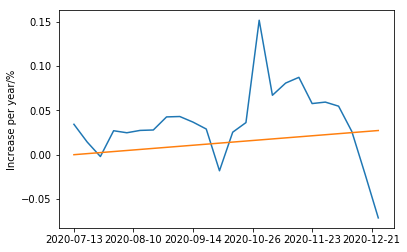

Final gain -0.07134347755697047
Market index 0.027279418690239036
For each transaction:
Max profit 0.11549281190135127
Max loss -0.08466929682060786
Rate of wins 0.5
Info for each transaction [True, False, False, True, False, True, True, True, True, False, False, False, True, True, True, False, True, True, False, True, False, False, False, False]


<Figure size 432x288 with 0 Axes>

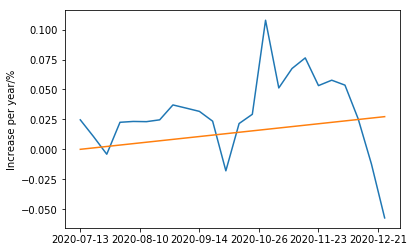

Final gain -0.0572923785400771
Market index 0.027279418690239036
For each transaction:
Max profit 0.07854477281972369
Max loss -0.05653143550555891
Rate of wins 0.4583333333333333
Info for each transaction [True, False, False, True, True, False, True, True, False, False, False, False, True, True, True, False, True, True, False, True, False, False, False, False]


<Figure size 432x288 with 0 Axes>

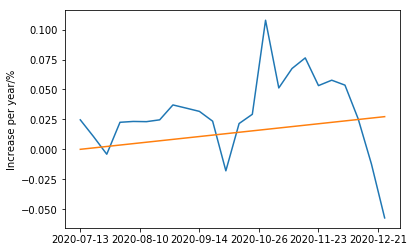

Final gain -0.0572923785400771
Market index 0.027279418690239036
For each transaction:
Max profit 0.07854477281972369
Max loss -0.05653143550555891
Rate of wins 0.4583333333333333
Info for each transaction [True, False, False, True, True, False, True, True, False, False, False, False, True, True, True, False, True, True, False, True, False, False, False, False]


In [189]:
name = ['家用电器(2021)', '基础化工(2021)', '机械设备(2021)', '商贸零售(2021)', '计算机(2021)', '国防军工(2021)', '钢铁(2021)', '传媒(2021)']
for i in range(len(name)):
    profit, res = all_profit(DTBS, s2020, name[0:i+1], 1, 1, 10)
    plot_str(s2020, profit)
    win_rt(res)

汽车(2021) 30


<Figure size 432x288 with 0 Axes>

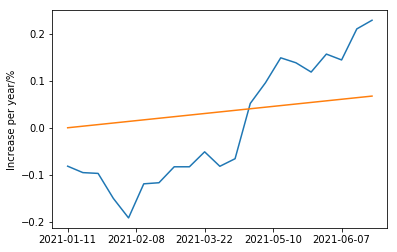

Final gain 0.22908172249221762
Market index 0.06749245755920898
For each transaction:
Max profit 0.11779944472378272
Max loss -0.08186850545140106
Rate of wins 0.5714285714285714
Info for each transaction [False, False, False, False, False, True, True, True, True, True, False, True, True, True, True, False, False, True, False, True, True]
汽车(2021) 30
交通运输(2021) 8


<Figure size 432x288 with 0 Axes>

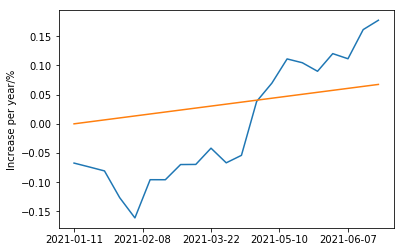

Final gain 0.17741970867510878
Market index 0.06749245755920898
For each transaction:
Max profit 0.09237196461920069
Max loss -0.06723202090736582
Rate of wins 0.5238095238095238
Info for each transaction [False, False, False, False, False, True, False, True, True, True, False, True, True, True, True, False, False, True, False, True, True]
汽车(2021) 30
交通运输(2021) 8
农林牧渔(2021) 17


<Figure size 432x288 with 0 Axes>

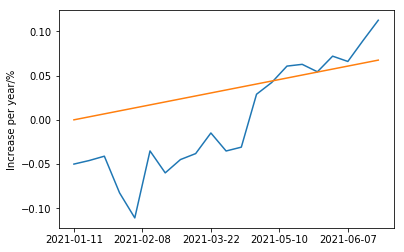

Final gain 0.11256316380415299
Market index 0.06749245755920898
For each transaction:
Max profit 0.07571036264002705
Max loss -0.050024603925838684
Rate of wins 0.6666666666666666
Info for each transaction [False, True, True, False, False, True, False, True, True, True, False, True, True, True, True, True, False, True, False, True, True]
汽车(2021) 30
交通运输(2021) 8
农林牧渔(2021) 17
煤炭(2021) 4


<Figure size 432x288 with 0 Axes>

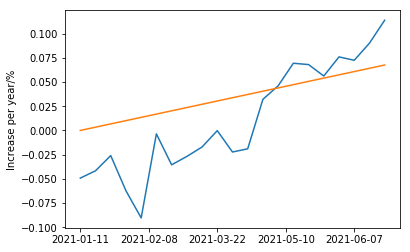

Final gain 0.1136867054813066
Market index 0.06749245755920898
For each transaction:
Max profit 0.08671899912802003
Max loss -0.049163916545692694
Rate of wins 0.6190476190476191
Info for each transaction [False, True, True, False, False, True, False, True, True, True, False, True, True, True, True, False, False, True, False, True, True]
汽车(2021) 30
交通运输(2021) 8
农林牧渔(2021) 17
煤炭(2021) 4
有色金属(2021) 18


<Figure size 432x288 with 0 Axes>

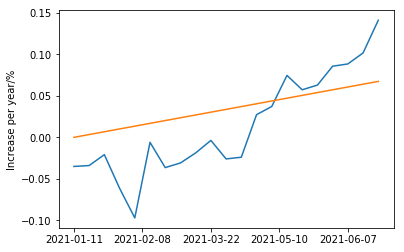

Final gain 0.14127530208844052
Market index 0.06749245755920898
For each transaction:
Max profit 0.09119127698205283
Max loss -0.0405625221814743
Rate of wins 0.7142857142857143
Info for each transaction [False, True, True, False, False, True, False, True, True, True, False, True, True, True, True, False, True, True, True, True, True]
汽车(2021) 30
交通运输(2021) 8
农林牧渔(2021) 17
煤炭(2021) 4
有色金属(2021) 18
商贸零售(2021) 3


<Figure size 432x288 with 0 Axes>

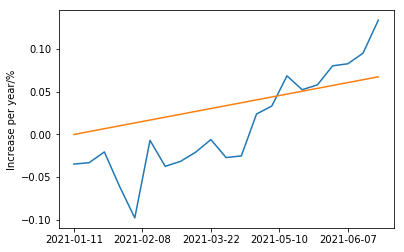

Final gain 0.13375470531718725
Market index 0.06749245755920898
For each transaction:
Max profit 0.09085251167987596
Max loss -0.0403259293037642
Rate of wins 0.7142857142857143
Info for each transaction [False, True, True, False, False, True, False, True, True, True, False, True, True, True, True, False, True, True, True, True, True]
汽车(2021) 30
交通运输(2021) 8
农林牧渔(2021) 17
煤炭(2021) 4
有色金属(2021) 18
商贸零售(2021) 3
机械设备(2021) 34


<Figure size 432x288 with 0 Axes>

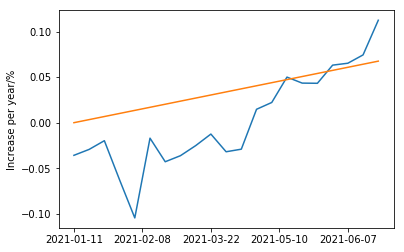

Final gain 0.11234417337180261
Market index 0.06749245755920898
For each transaction:
Max profit 0.0874531773212168
Max loss -0.042935334931033894
Rate of wins 0.6666666666666666
Info for each transaction [False, True, True, False, False, True, False, True, True, True, False, True, True, True, True, False, False, True, True, True, True]
汽车(2021) 30
交通运输(2021) 8
农林牧渔(2021) 17
煤炭(2021) 4
有色金属(2021) 18
商贸零售(2021) 3
机械设备(2021) 34
钢铁(2021) 7


<Figure size 432x288 with 0 Axes>

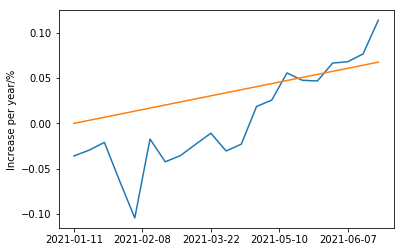

Final gain 0.113695701543365
Market index 0.06749245755920898
For each transaction:
Max profit 0.08693792807560508
Max loss -0.04238045356155488
Rate of wins 0.6666666666666666
Info for each transaction [False, True, True, False, False, True, False, True, True, True, False, True, True, True, True, False, False, True, True, True, True]
汽车(2021) 30
交通运输(2021) 8
农林牧渔(2021) 17
煤炭(2021) 4
有色金属(2021) 18
商贸零售(2021) 3
机械设备(2021) 34
钢铁(2021) 7
电力设备(2021) 41


<Figure size 432x288 with 0 Axes>

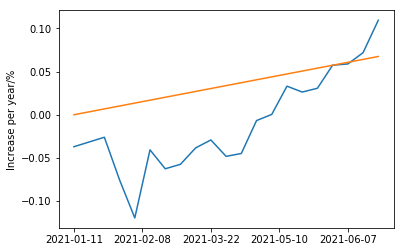

Final gain 0.10950617478493661
Market index 0.06749245755920898
For each transaction:
Max profit 0.07887935779550677
Max loss -0.04942920736627242
Rate of wins 0.7142857142857143
Info for each transaction [False, True, True, False, False, True, False, True, True, True, False, True, True, True, True, False, True, True, True, True, True]
汽车(2021) 30
交通运输(2021) 8
农林牧渔(2021) 17
煤炭(2021) 4
有色金属(2021) 18
商贸零售(2021) 3
机械设备(2021) 34
钢铁(2021) 7
电力设备(2021) 41
基础化工(2021) 45


<Figure size 432x288 with 0 Axes>

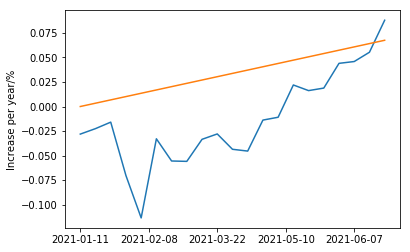

Final gain 0.08790232344111819
Market index 0.06749245755920898
For each transaction:
Max profit 0.08061498588873978
Max loss -0.05444932010995181
Rate of wins 0.6190476190476191
Info for each transaction [False, True, True, False, False, True, False, False, True, True, False, False, True, True, True, False, True, True, True, True, True]


In [196]:
name = ['汽车(2021)', '交通运输(2021)', '农林牧渔(2021)', '煤炭(2021)', '有色金属(2021)', '商贸零售(2021)', '机械设备(2021)', '钢铁(2021)', '电力设备(2021)', '基础化工(2021)']
for i in range(len(name)):
    profit, res = all_profit(DTBS, f2021, name[0:i+1], 1, 0, 10)
    plot_str(f2021, profit)
    win_rt(res)

电力设备(2021) 41


<Figure size 432x288 with 0 Axes>

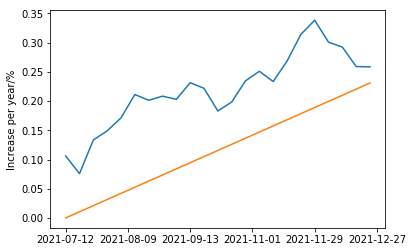

Final gain 0.25873172705937986
Market index 0.23104665931926124
For each transaction:
Max profit 0.10601900555471427
Max loss -0.0388309484689818
Rate of wins 0.5652173913043478
Info for each transaction [True, False, True, True, True, True, False, True, False, True, False, False, True, True, True, False, True, True, True, False, False, False, False]
电力设备(2021) 41
有色金属(2021) 18


<Figure size 432x288 with 0 Axes>

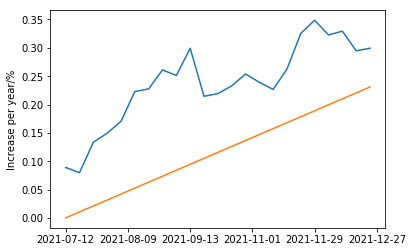

Final gain 0.29933555685116203
Market index 0.23104665931926124
For each transaction:
Max profit 0.08897297269583443
Max loss -0.0846025300799006
Rate of wins 0.6956521739130435
Info for each transaction [True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, False, True, True, True, False, True, False, True]
电力设备(2021) 41
有色金属(2021) 18
交通运输(2021) 8


<Figure size 432x288 with 0 Axes>

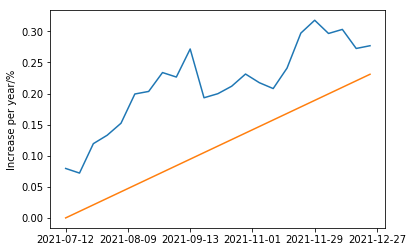

Final gain 0.2769418905246717
Market index 0.23104665931926124
For each transaction:
Max profit 0.07956066559544844
Max loss -0.0784597219543019
Rate of wins 0.6956521739130435
Info for each transaction [True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, False, True, True, True, False, True, False, True]
电力设备(2021) 41
有色金属(2021) 18
交通运输(2021) 8
钢铁(2021) 7


<Figure size 432x288 with 0 Axes>

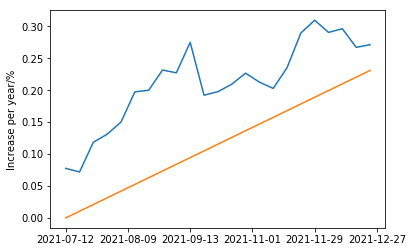

Final gain 0.2713459076949674
Market index 0.23104665931926124
For each transaction:
Max profit 0.07758741040956522
Max loss -0.08270208315433926
Rate of wins 0.6956521739130435
Info for each transaction [True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, False, True, True, True, False, True, False, True]
电力设备(2021) 41
有色金属(2021) 18
交通运输(2021) 8
钢铁(2021) 7
通信(2021) 5


<Figure size 432x288 with 0 Axes>

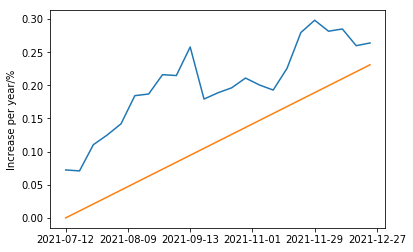

Final gain 0.26396516046797064
Market index 0.23104665931926124
For each transaction:
Max profit 0.07239282945077878
Max loss -0.07856706794241507
Rate of wins 0.6956521739130435
Info for each transaction [True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, False, True, True, True, False, True, False, True]
电力设备(2021) 41
有色金属(2021) 18
交通运输(2021) 8
钢铁(2021) 7
通信(2021) 5
汽车(2021) 30


<Figure size 432x288 with 0 Axes>

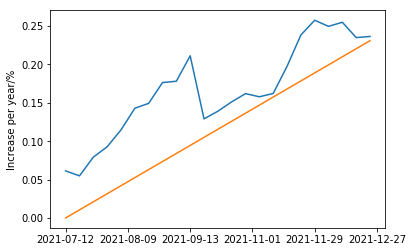

Final gain 0.236571679756413
Market index 0.23104665931926124
For each transaction:
Max profit 0.061268020904087596
Max loss -0.08220298010182146
Rate of wins 0.782608695652174
Info for each transaction [True, False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, False, True, False, True]
电力设备(2021) 41
有色金属(2021) 18
交通运输(2021) 8
钢铁(2021) 7
通信(2021) 5
汽车(2021) 30
基础化工(2021) 45


<Figure size 432x288 with 0 Axes>

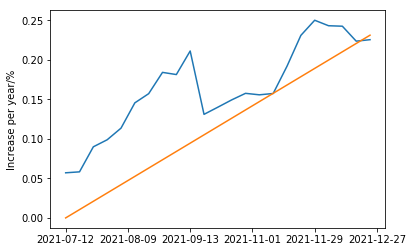

Final gain 0.22534627668641044
Market index 0.23104665931926124
For each transaction:
Max profit 0.057043869654241776
Max loss -0.08010490516066296
Rate of wins 0.7391304347826086
Info for each transaction [True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, False, False, False, True]
电力设备(2021) 41
有色金属(2021) 18
交通运输(2021) 8
钢铁(2021) 7
通信(2021) 5
汽车(2021) 30
基础化工(2021) 45
国防军工(2021) 7


<Figure size 432x288 with 0 Axes>

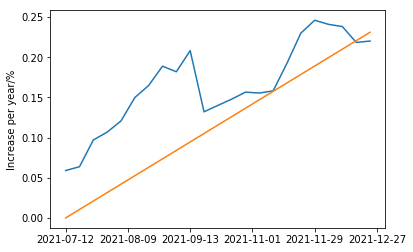

Final gain 0.22009122740180648
Market index 0.23104665931926124
For each transaction:
Max profit 0.0589682828755651
Max loss -0.0761472270676397
Rate of wins 0.7391304347826086
Info for each transaction [True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, False, False, False, True]


In [198]:
name = ['电力设备(2021)', '有色金属(2021)', '交通运输(2021)', '钢铁(2021)', '通信(2021)', '汽车(2021)', '基础化工(2021)','国防军工(2021)']
for i in range(len(name)):
    profit, res = all_profit(DTBS, s2021, name[0:i+1], 1, 0, 10)
    plot_str(s2021, profit)
    win_rt(res)

有色金属(2021) 18


<Figure size 432x288 with 0 Axes>

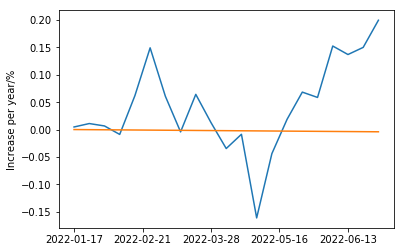

Final gain 0.1996153261355258
Market index -0.004073690919472521
For each transaction:
Max profit 0.11738067835186489
Max loss -0.15273672904683597
Rate of wins 0.5714285714285714
Info for each transaction [True, True, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, False, True, True]
有色金属(2021) 18
农林牧渔(2021) 17


<Figure size 432x288 with 0 Axes>

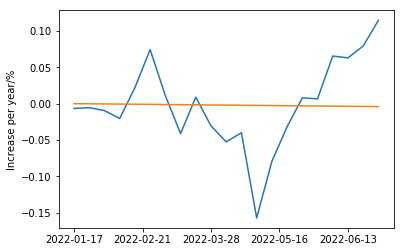

Final gain 0.1145708845202014
Market index -0.004073690919472521
For each transaction:
Max profit 0.07768200801986944
Max loss -0.11711302046059432
Rate of wins 0.5238095238095238
Info for each transaction [False, True, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, False, True, True]
有色金属(2021) 18
农林牧渔(2021) 17
汽车(2021) 30


<Figure size 432x288 with 0 Axes>

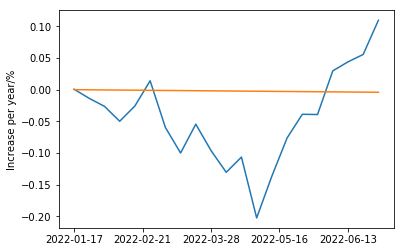

Final gain 0.10962702645464456
Market index -0.004073690919472521
For each transaction:
Max profit 0.0688543192502916
Max loss -0.09605225646002698
Rate of wins 0.5714285714285714
Info for each transaction [True, False, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, True, True, True]
有色金属(2021) 18
农林牧渔(2021) 17
汽车(2021) 30
交通运输(2021) 8


<Figure size 432x288 with 0 Axes>

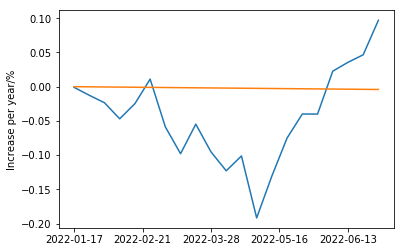

Final gain 0.09705762630742096
Market index -0.004073690919472521
For each transaction:
Max profit 0.06265549775646846
Max loss -0.09049244758500757
Rate of wins 0.5238095238095238
Info for each transaction [False, False, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, True, True, True]
有色金属(2021) 18
农林牧渔(2021) 17
汽车(2021) 30
交通运输(2021) 8
国防军工(2021) 7


<Figure size 432x288 with 0 Axes>

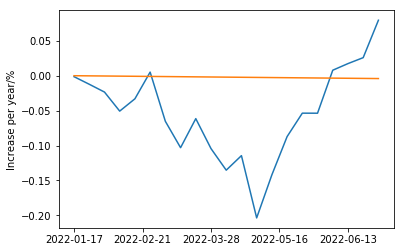

Final gain 0.07946263210592076
Market index -0.004073690919472521
For each transaction:
Max profit 0.06171172029363679
Max loss -0.08921832986927233
Rate of wins 0.5238095238095238
Info for each transaction [False, False, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, True, True, True]
有色金属(2021) 18
农林牧渔(2021) 17
汽车(2021) 30
交通运输(2021) 8
国防军工(2021) 7
医药生物(2021) 43


<Figure size 432x288 with 0 Axes>

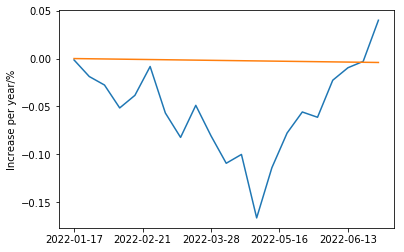

Final gain 0.04000629086601707
Market index -0.004073690919472521
For each transaction:
Max profit 0.05239543116050242
Max loss -0.06625594630488618
Rate of wins 0.5238095238095238
Info for each transaction [False, False, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, True, True, True]
有色金属(2021) 18
农林牧渔(2021) 17
汽车(2021) 30
交通运输(2021) 8
国防军工(2021) 7
医药生物(2021) 43
通信(2021) 5


<Figure size 432x288 with 0 Axes>

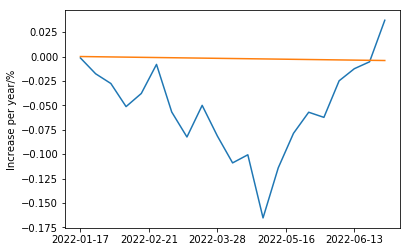

Final gain 0.03718889969970295
Market index -0.004073690919472521
For each transaction:
Max profit 0.0513302327103648
Max loss -0.06468856515181515
Rate of wins 0.5238095238095238
Info for each transaction [False, False, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, True, True, True]
有色金属(2021) 18
农林牧渔(2021) 17
汽车(2021) 30
交通运输(2021) 8
国防军工(2021) 7
医药生物(2021) 43
通信(2021) 5
电力设备(2021) 41


<Figure size 432x288 with 0 Axes>

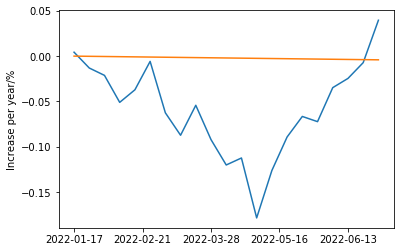

Final gain 0.039573830745849
Market index -0.004073690919472521
For each transaction:
Max profit 0.05230284800951048
Max loss -0.06609555739139765
Rate of wins 0.5714285714285714
Info for each transaction [True, False, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, True, True, True]


In [203]:
name = ['有色金属(2021)', '农林牧渔(2021)', '汽车(2021)', '交通运输(2021)', '国防军工(2021)', '医药生物(2021)', '通信(2021)', '电力设备(2021)']
for i in range(len(name)):
    profit, res = all_profit(DTBS, f2022, name[0:i+1], 1, 0, 10)
    plot_str(f2022, profit)
    win_rt(res)

<Figure size 432x288 with 0 Axes>

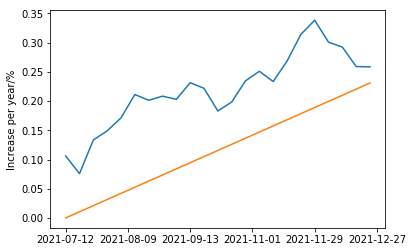

Final gain 0.25873172705937986
Market index 0.23104665931926124
For each transaction:
Max profit 0.10601900555471427
Max loss -0.0388309484689818
Rate of wins 0.5652173913043478
Info for each transaction [True, False, True, True, True, True, False, True, False, True, False, False, True, True, True, False, True, True, True, False, False, False, False]


In [160]:

['电力设备(2021)', '有色金属(2021)', '交通运输(2021)', '钢铁(2021)', '通信(2021)', '汽车(2021)', '基础化工(2021)', '轻工制造(2021)', '国防军工(2021)', '医药生物(2021)'
profit, res = all_profit(DTBS, s2021, ['电力设备(2021)'], 1, 0, 2)
plot_str(s2021, profit)
win_rt(res)

<Figure size 432x288 with 0 Axes>

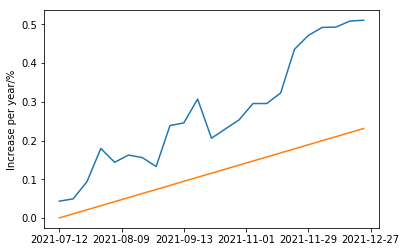

Final gain 0.5107943623085556
Market index 0.23104665931926124
For each transaction:
Max profit 0.11284416112844173
Max loss -0.10121504563688169
Rate of wins 0.8260869565217391
Info for each transaction [True, True, True, True, False, True, False, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True]


In [168]:
profit, res = all_profit(DTBS, s2021, ['电力设备(2021)'], 1, 1, 2)
plot_str(s2021, profit)
win_rt(res)

<Figure size 432x288 with 0 Axes>

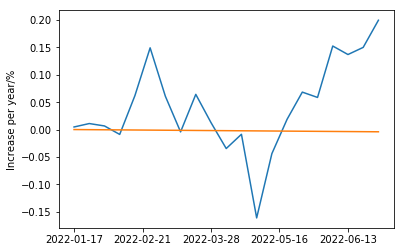

Final gain 0.1996153261355258
Market index -0.004073690919472521
For each transaction:
Max profit 0.11738067835186489
Max loss -0.15273672904683597
Rate of wins 0.5714285714285714
Info for each transaction [True, True, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, False, True, True]


In [169]:
profit, res = all_profit(DTBS, f2022, ['有色金属(2021)'], 1, 0, 2)
plot_str(f2022, profit)
win_rt(res)

<Figure size 432x288 with 0 Axes>

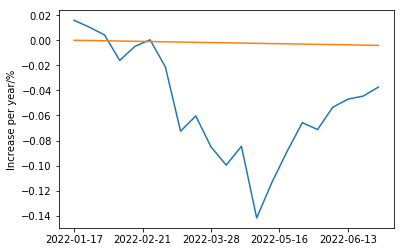

Final gain -0.037355183957547736
Market index -0.004073690919472521
For each transaction:
Max profit 0.028258132167039273
Max loss -0.05721190203591904
Rate of wins 0.5714285714285714
Info for each transaction [True, False, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, True, True, True]


In [170]:
profit, res = all_profit(DTBS, f2022, ['有色金属(2021)'], 1, 1, 2)
plot_str(f2022, profit)
win_rt(res)

In [162]:
profit, res = all_profit(DTBS, s2022, '有色金属(2021)')
plot_str(s2022, profit)

TypeError: all_profit() missing 3 required positional arguments: 'sel_ct', 'sel_dl', and 'sel_num'

In [ ]:
profit, res = all_profit(DTBS, f2023, '电力设备(2021)')
plot_str(f2023, profit)

传媒(2021) 6


<Figure size 432x288 with 0 Axes>

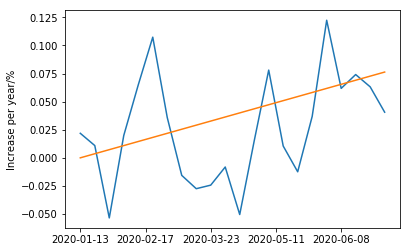

Final gain 0.040594759165223065
Market index 0.07631050038558825
For each transaction:
Max profit 0.0855445909237404
Max loss -0.07147748080987458
Rate of wins 0.5
Info for each transaction [True, False, False, True, True, True, False, False, False, True, True, False, True, True, False, False, True, True, False, True, False, False]
传媒(2021) 6
非银金融(2021) 9


<Figure size 432x288 with 0 Axes>

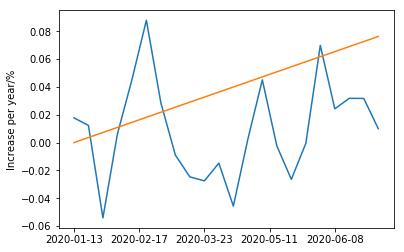

Final gain 0.00996046701529658
Market index 0.07631050038558825
For each transaction:
Max profit 0.0704936617540966
Max loss -0.06653973511781541
Rate of wins 0.45454545454545453
Info for each transaction [True, False, False, True, True, True, False, False, False, False, True, False, True, True, False, False, True, True, False, True, False, False]
传媒(2021) 6
非银金融(2021) 9
汽车(2021) 30


<Figure size 432x288 with 0 Axes>

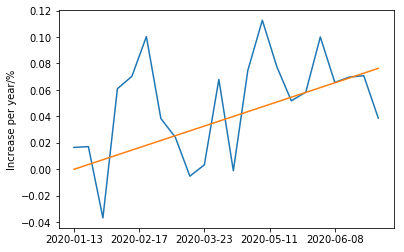

Final gain 0.03871237813514933
Market index 0.07631050038558825
For each transaction:
Max profit 0.09765463471847362
Max loss -0.06893646353760165
Rate of wins 0.5909090909090909
Info for each transaction [True, True, False, True, True, True, False, False, False, True, True, False, True, True, False, False, True, True, False, True, True, False]
传媒(2021) 6
非银金融(2021) 9
汽车(2021) 30
食品饮料(2021) 7


<Figure size 432x288 with 0 Axes>

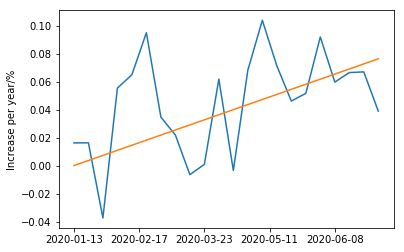

Final gain 0.03890227635942274
Market index 0.07631050038558825
For each transaction:
Max profit 0.09276783430447459
Max loss -0.06526555549600717
Rate of wins 0.5909090909090909
Info for each transaction [True, True, False, True, True, True, False, False, False, True, True, False, True, True, False, False, True, True, False, True, True, False]


In [214]:
# 5行业
name = ['传媒(2021)', '非银金融(2021)', '汽车(2021)', '食品饮料(2021)']
for i in range(len(name)):
    profit, res = all_profit(DTBS, f2020, name[0:i+1], 1, 0, 10)
    plot_str(f2020, profit)
    win_rt(res)

家用电器(2021) 9


<Figure size 432x288 with 0 Axes>

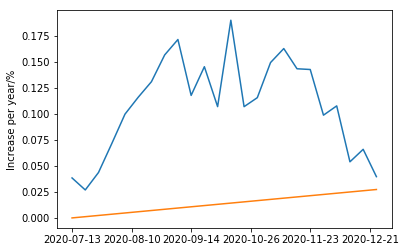

Final gain 0.039628021293259645
Market index 0.027279418690239036
For each transaction:
Max profit 0.08295155078045817
Max loss -0.08299951330912364
Rate of wins 0.625
Info for each transaction [True, False, True, True, True, True, True, True, True, False, True, False, True, False, True, True, True, False, False, False, True, False, True, False]
家用电器(2021) 9
轻工制造(2021) 21


<Figure size 432x288 with 0 Axes>

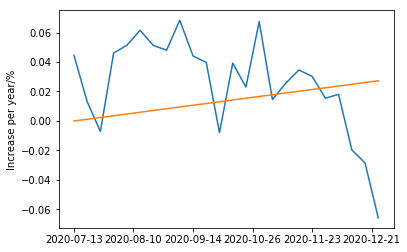

Final gain -0.0657292199288872
Market index 0.027279418690239036
For each transaction:
Max profit 0.05309503485953719
Max loss -0.05292581718911614
Rate of wins 0.4166666666666667
Info for each transaction [True, False, False, True, True, True, False, False, True, False, False, False, True, False, True, False, True, True, False, False, True, False, False, False]
家用电器(2021) 9
轻工制造(2021) 21
建筑装饰(2021) 23


<Figure size 432x288 with 0 Axes>

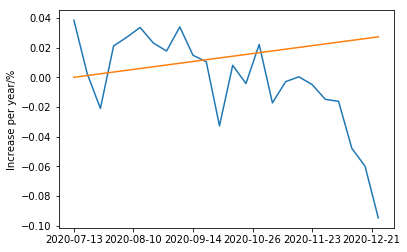

Final gain -0.09487331469725259
Market index 0.027279418690239036
For each transaction:
Max profit 0.04217134905754757
Max loss -0.04328770120260072
Rate of wins 0.375
Info for each transaction [True, False, False, True, True, True, False, False, True, False, False, False, True, False, True, False, True, True, False, False, False, False, False, False]
家用电器(2021) 9
轻工制造(2021) 21
建筑装饰(2021) 23
商贸零售(2021) 3


<Figure size 432x288 with 0 Axes>

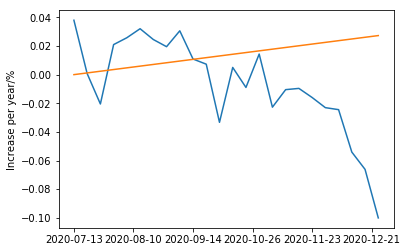

Final gain -0.10010941066554563
Market index 0.027279418690239036
For each transaction:
Max profit 0.04149021129830119
Max loss -0.04062029800486169
Rate of wins 0.375
Info for each transaction [True, False, False, True, True, True, False, False, True, False, False, False, True, False, True, False, True, True, False, False, False, False, False, False]
家用电器(2021) 9
轻工制造(2021) 21
建筑装饰(2021) 23
商贸零售(2021) 3
环保(2021) 18


<Figure size 432x288 with 0 Axes>

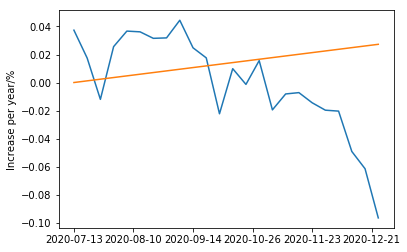

Final gain -0.0966850820581632
Market index 0.027279418690239036
For each transaction:
Max profit 0.037652531454283746
Max loss -0.03991721073013153
Rate of wins 0.375
Info for each transaction [True, False, False, True, True, False, False, True, True, False, False, False, True, False, True, False, True, True, False, False, False, False, False, False]


In [215]:
# 5行业
name = ['家用电器(2021)', '轻工制造(2021)', '建筑装饰(2021)', '商贸零售(2021)', '环保(2021)']
for i in range(len(name)):
    profit, res = all_profit(DTBS, s2020, name[0:i+1], 1, 0, 10)
    plot_str(s2020, profit)
    win_rt(res)

公用事业(2021) 10


<Figure size 432x288 with 0 Axes>

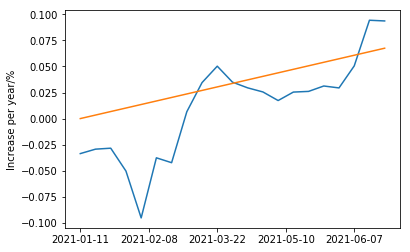

Final gain 0.09365121192466178
Market index 0.06749245755920898
For each transaction:
Max profit 0.057650089277873615
Max loss -0.044945940468119915
Rate of wins 0.5238095238095238
Info for each transaction [False, True, True, False, False, True, False, True, True, True, False, False, False, False, True, True, True, False, True, True, False]
公用事业(2021) 10
环保(2021) 18


<Figure size 432x288 with 0 Axes>

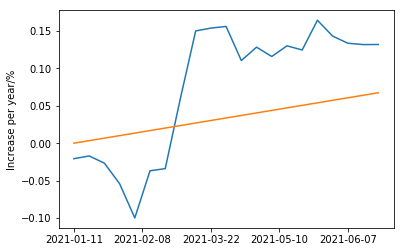

Final gain 0.1320728559359871
Market index 0.06749245755920898
For each transaction:
Max profit 0.09432297434678016
Max loss -0.04587364161268469
Rate of wins 0.5238095238095238
Info for each transaction [False, True, False, False, False, True, True, True, True, True, True, False, True, False, True, False, True, False, False, False, True]
公用事业(2021) 10
环保(2021) 18
交通运输(2021) 8


<Figure size 432x288 with 0 Axes>

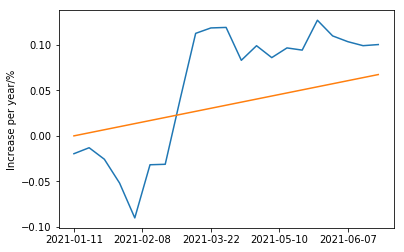

Final gain 0.1005087272457892
Market index 0.06749245755920898
For each transaction:
Max profit 0.0730776240337074
Max loss -0.038363819535146004
Rate of wins 0.5238095238095238
Info for each transaction [False, True, False, False, False, True, True, True, True, True, True, False, True, False, True, False, True, False, False, False, True]
公用事业(2021) 10
环保(2021) 18
交通运输(2021) 8
有色金属(2021) 18


<Figure size 432x288 with 0 Axes>

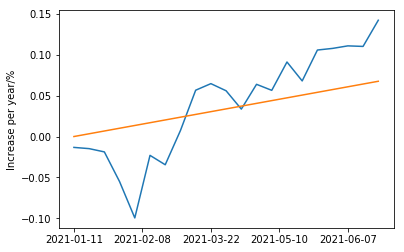

Final gain 0.1420202659227741
Market index 0.06749245755920898
For each transaction:
Max profit 0.07639947495910027
Max loss -0.04434961453297368
Rate of wins 0.47619047619047616
Info for each transaction [False, False, False, False, False, True, False, True, True, True, False, False, True, False, True, False, True, True, True, False, True]
公用事业(2021) 10
环保(2021) 18
交通运输(2021) 8
有色金属(2021) 18
汽车(2021) 30


<Figure size 432x288 with 0 Axes>

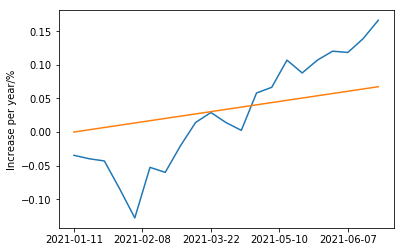

Final gain 0.16648026756313458
Market index 0.06749245755920898
For each transaction:
Max profit 0.07530354145935422
Max loss -0.04357019805417075
Rate of wins 0.5238095238095238
Info for each transaction [False, False, False, False, False, True, False, True, True, True, False, False, True, True, True, False, True, True, False, True, True]


In [209]:
# 5行业
name = ['公用事业(2021)', '环保(2021)', '交通运输(2021)', '有色金属(2021)', '汽车(2021)']
for i in range(len(name)):
    profit, res = all_profit(DTBS, f2021, name[0:i+1], 1, 0, 10)
    plot_str(f2021, profit)
    win_rt(res)


电力设备(2021) 41


<Figure size 432x288 with 0 Axes>

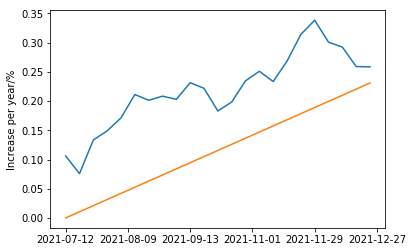

Final gain 0.25873172705937986
Market index 0.23104665931926124
For each transaction:
Max profit 0.10601900555471427
Max loss -0.0388309484689818
Rate of wins 0.5652173913043478
Info for each transaction [True, False, True, True, True, True, False, True, False, True, False, False, True, True, True, False, True, True, True, False, False, False, False]
电力设备(2021) 41
公用事业(2021) 10


<Figure size 432x288 with 0 Axes>

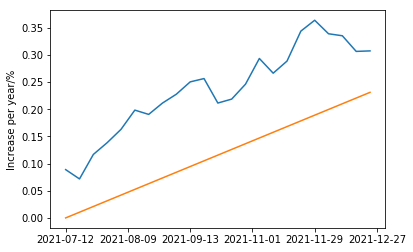

Final gain 0.3072899582311443
Market index 0.23104665931926124
For each transaction:
Max profit 0.08884710859676581
Max loss -0.04503921234011444
Rate of wins 0.6956521739130435
Info for each transaction [True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, False, False, False, True]
电力设备(2021) 41
公用事业(2021) 10
通信(2021) 5


<Figure size 432x288 with 0 Axes>

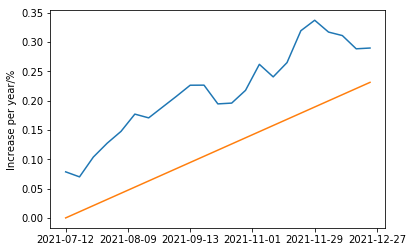

Final gain 0.28953496433475373
Market index 0.23104665931926124
For each transaction:
Max profit 0.0785336889863797
Max loss -0.03195228515201212
Rate of wins 0.6956521739130435
Info for each transaction [True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, False, False, False, True]
电力设备(2021) 41
公用事业(2021) 10
通信(2021) 5
轻工制造(2021) 21


<Figure size 432x288 with 0 Axes>

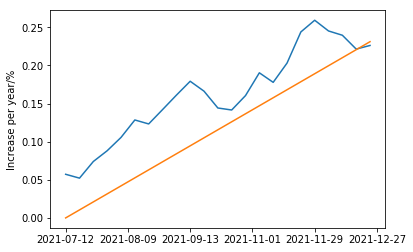

Final gain 0.2260910699570335
Market index 0.23104665931926124
For each transaction:
Max profit 0.05720079190410122
Max loss -0.02204201551424118
Rate of wins 0.6086956521739131
Info for each transaction [True, False, True, True, True, True, False, True, True, True, False, False, False, True, True, False, True, True, True, False, False, False, True]
电力设备(2021) 41
公用事业(2021) 10
通信(2021) 5
轻工制造(2021) 21
汽车(2021) 30


<Figure size 432x288 with 0 Axes>

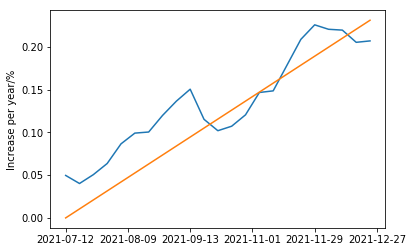

Final gain 0.2068913158592556
Market index 0.23104665931926124
For each transaction:
Max profit 0.04966301515722945
Max loss -0.03519311397012189
Rate of wins 0.7391304347826086
Info for each transaction [True, False, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, False, False, False, True]


In [210]:
# 5行业
name = ['电力设备(2021)', '公用事业(2021)', '通信(2021)', '轻工制造(2021)', '汽车(2021)']
for i in range(len(name)):
    profit, res = all_profit(DTBS, s2021, name[0:i+1], 1, 0, 10)
    plot_str(s2021, profit)
    win_rt(res)

有色金属(2021) 18


<Figure size 432x288 with 0 Axes>

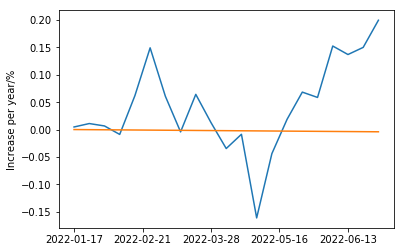

Final gain 0.1996153261355258
Market index -0.004073690919472521
For each transaction:
Max profit 0.11738067835186489
Max loss -0.15273672904683597
Rate of wins 0.5714285714285714
Info for each transaction [True, True, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, False, True, True]
有色金属(2021) 18
公共事业(2021) 0


<Figure size 432x288 with 0 Axes>

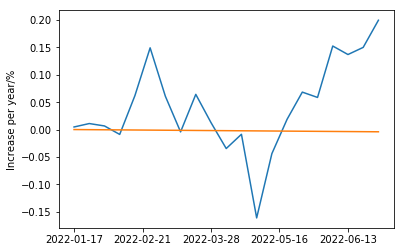

Final gain 0.1996153261355258
Market index -0.004073690919472521
For each transaction:
Max profit 0.11738067835186489
Max loss -0.15273672904683597
Rate of wins 0.5714285714285714
Info for each transaction [True, True, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, False, True, True]
有色金属(2021) 18
公共事业(2021) 0
银行(2021) 19


<Figure size 432x288 with 0 Axes>

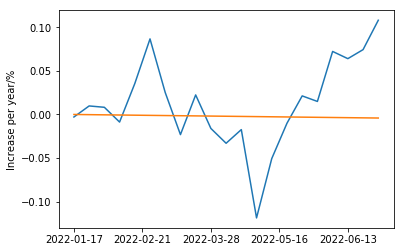

Final gain 0.10807728586928597
Market index -0.004073690919472521
For each transaction:
Max profit 0.06805612733173323
Max loss -0.10129533037687541
Rate of wins 0.5238095238095238
Info for each transaction [False, True, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, False, True, True]
有色金属(2021) 18
公共事业(2021) 0
银行(2021) 19
石油石化(2021) 5


<Figure size 432x288 with 0 Axes>

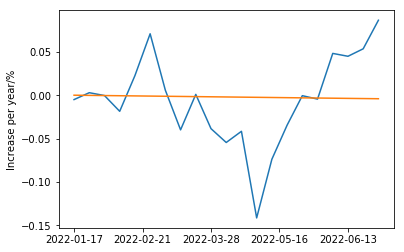

Final gain 0.08646746940471692
Market index -0.004073690919472521
For each transaction:
Max profit 0.06768797732558311
Max loss -0.09992007732095512
Rate of wins 0.5238095238095238
Info for each transaction [False, True, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, False, True, True]
有色金属(2021) 18
公共事业(2021) 0
银行(2021) 19
石油石化(2021) 5
环保(2021) 18


<Figure size 432x288 with 0 Axes>

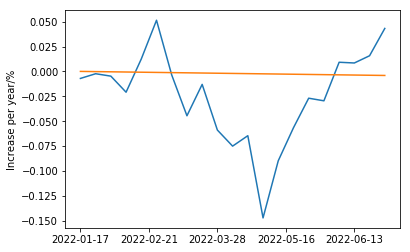

Final gain 0.04313569943310517
Market index -0.004073690919472521
For each transaction:
Max profit 0.0573719448410814
Max loss -0.08256061028717321
Rate of wins 0.5238095238095238
Info for each transaction [False, True, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, False, True, True]


In [211]:
# 5行业
name = ['有色金属(2021)', '公共事业(2021)', '银行(2021)', '石油石化(2021)', '环保(2021)']
for i in range(len(name)):
    profit, res = all_profit(DTBS, f2022, name[0:i+1], 1, 0, 10)
    plot_str(f2022, profit)
    win_rt(res)

公用事业(2021) 10


<Figure size 432x288 with 0 Axes>

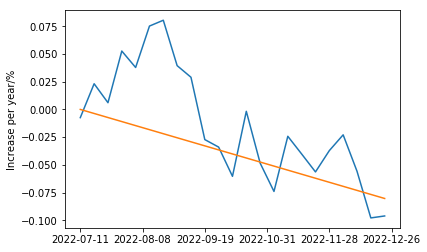

Final gain -0.09616203989526835
Market index -0.0803778640396854
For each transaction:
Max profit 0.058684750144071915
Max loss -0.056256425986458795
Rate of wins 0.391304347826087
Info for each transaction [False, True, False, True, False, True, True, False, False, False, False, False, True, False, False, True, False, False, True, True, False, False, True]
公用事业(2021) 10
食品饮料(2021) 7


<Figure size 432x288 with 0 Axes>

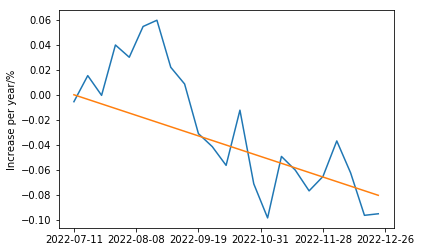

Final gain -0.095134471918011
Market index -0.0803778640396854
For each transaction:
Max profit 0.049160735666408016
Max loss -0.05886250455044802
Rate of wins 0.391304347826087
Info for each transaction [False, True, False, True, False, True, True, False, False, False, False, False, True, False, False, True, False, False, True, True, False, False, True]
公用事业(2021) 10
食品饮料(2021) 7
医药生物(2021) 43


<Figure size 432x288 with 0 Axes>

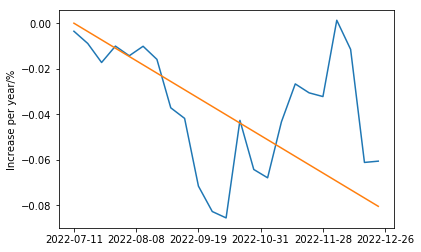

Final gain -0.06055413940189274
Market index -0.0803778640396854
For each transaction:
Max profit 0.04282174227873647
Max loss -0.04962690520089292
Rate of wins 0.30434782608695654
Info for each transaction [False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, True, True, False, False, True, False, False, True]
公用事业(2021) 10
食品饮料(2021) 7
医药生物(2021) 43
轻工制造(2021) 21


<Figure size 432x288 with 0 Axes>

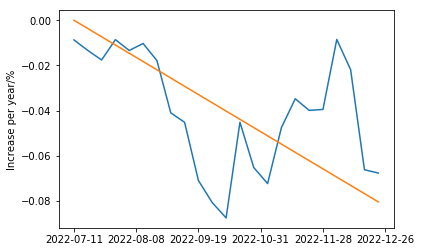

Final gain -0.06761195637439942
Market index -0.0803778640396854
For each transaction:
Max profit 0.04232342859010521
Max loss -0.044279339347633874
Rate of wins 0.30434782608695654
Info for each transaction [False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, True, True, False, True, True, False, False, False]
公用事业(2021) 10
食品饮料(2021) 7
医药生物(2021) 43
轻工制造(2021) 21
建筑材料(2021) 9


<Figure size 432x288 with 0 Axes>

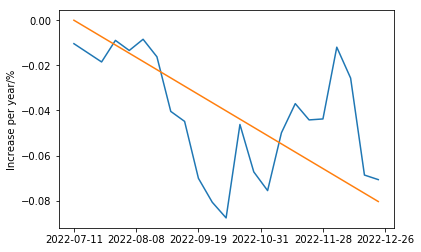

Final gain -0.07066486856174034
Market index -0.0803778640396854
For each transaction:
Max profit 0.04142182178297899
Max loss -0.04298811009808151
Rate of wins 0.30434782608695654
Info for each transaction [False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, True, True, False, True, True, False, False, False]


In [212]:
# 5行业
name = ['公用事业(2021)', '食品饮料(2021)', '医药生物(2021)', '轻工制造(2021)', '建筑材料(2021)']
for i in range(len(name)):
    profit, res = all_profit(DTBS, s2022, name[0:i+1], 1, 0, 10)
    plot_str(s2022, profit)
    win_rt(res)

建筑材料(2021) 9


<Figure size 432x288 with 0 Axes>

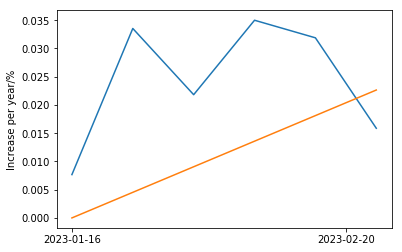

Final gain 0.015872967763599942
Market index 0.02264099846626163
For each transaction:
Max profit 0.02587072762130103
Max loss -0.016008319269498895
Rate of wins 0.5
Info for each transaction [True, True, False, True, False, False]
建筑材料(2021) 9
建筑装饰(2021) 23


<Figure size 432x288 with 0 Axes>

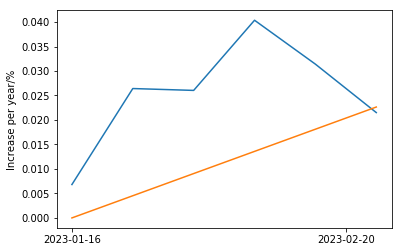

Final gain 0.021507693776317727
Market index 0.02264099846626163
For each transaction:
Max profit 0.019600709905871656
Max loss -0.009887385648591198
Rate of wins 0.5
Info for each transaction [True, True, False, True, False, False]
建筑材料(2021) 9
建筑装饰(2021) 23
国防军工(2021) 7


<Figure size 432x288 with 0 Axes>

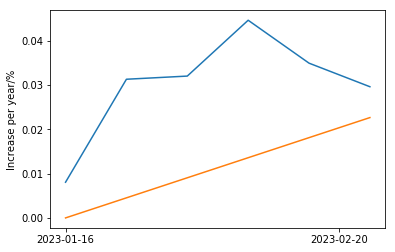

Final gain 0.029602211772770233
Market index 0.02264099846626163
For each transaction:
Max profit 0.02323660758513916
Max loss -0.00968433858043108
Rate of wins 0.6666666666666666
Info for each transaction [True, True, True, True, False, False]
建筑材料(2021) 9
建筑装饰(2021) 23
国防军工(2021) 7
计算机(2021) 26


<Figure size 432x288 with 0 Axes>

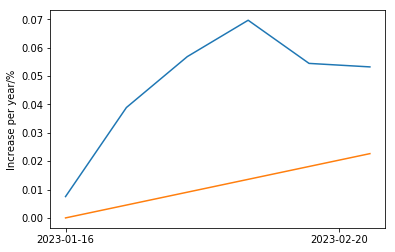

Final gain 0.05318635711129322
Market index 0.02264099846626163
For each transaction:
Max profit 0.03136234643129051
Max loss -0.015198427331096406
Rate of wins 0.6666666666666666
Info for each transaction [True, True, True, True, False, False]
建筑材料(2021) 9
建筑装饰(2021) 23
国防军工(2021) 7
计算机(2021) 26
通信(2021) 5


<Figure size 432x288 with 0 Axes>

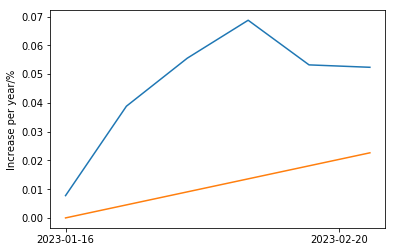

Final gain 0.05238101479094397
Market index 0.02264099846626163
For each transaction:
Max profit 0.031096376799682766
Max loss -0.015522571004171419
Rate of wins 0.6666666666666666
Info for each transaction [True, True, True, True, False, False]


In [213]:
# 5行业
name = ['建筑材料(2021)', '建筑装饰(2021)', '国防军工(2021)', '计算机(2021)', '通信(2021)']
for i in range(len(name)):
    profit, res = all_profit(DTBS, a2023, name[0:i+1], 1, 0, 10)
    plot_str(a2023, profit)
    win_rt(res)

In [ ]:
lst10_i = [['传媒(2021)', '农林牧渔(2021)', '轻工制造(2021)', '银行(2021)', '非银金融(2021)', '汽车(2021)', '纺织服饰(2021)', '电力设备(2021)', '食品饮料(2021)', '通信(2021)'], ['家用电器(2021)', '轻工制造(2021)', '建筑材料(2021)', '建筑装饰(2021)', '非银金融(2021)', '国防军工(2021)', '商贸零售(2021)', '公用事业(2021)', '环保(2021)', '基础化工(2021)'], ['公用事业(2021)', '环保(2021)', '交通运输(2021)', '有色金属(2021)', '汽车(2021)', '商贸零售(2021)', '社会服务(2021)', '通信(2021)', '农林牧渔(2021)', '电力设备(2021)'], ['电力设备(2021)', '公用事业(2021)', '通信(2021)', '机械设备(2021)', '国防军工(2021)', '有色金属(2021)', '美容护理(2021)', '轻工制造(2021)', '汽车(2021)', '医药生物(2021)'], ['有色金属(2021)', '公共事业(2021)', '银行(2021)', '电力设备(2021)', '食品饮料(2021)', '非银金融(2021)', '石油石化(2021)', '国防军工(2021)', '机械设备(2021)', '环保(2021)'], ['有色金属(2021)', '农林牧渔(2021)', '汽车(2021)', '电力设备(2021)', '公用事业(2021)', '社会服务(2021)', '食品饮料(2021)', '医药生物(2021)', '轻工制造(2021)', '建筑材料(2021)'], ['建筑材料(2021)', '建筑装饰(2021)', '国防军工(2021)', '计算机(2021)', '通信(2021)', '食品饮料(2021)', '社会服务(2021)', '纺织服饰(2021)', '交通运输(2021)', '轻工制造(2021)']]